### TP1 Skander Karoui 2 GT 1

In [428]:
import pandas as pd # manipulation des tableaux
import numpy as np # calcul matriciel, algebrique
import matplotlib.pyplot as plt # visualisation graphique des donnees, pyplot pour le tracage des graphiques en 2D
import seaborn as sns # manipulation des statistiques

In [429]:
import warnings # generer les erreurs et les alertes
warnings.filterwarnings("ignore") # ignorer les alertes

In [430]:
df = pd.read_csv("stroke_data.csv") #importer la base de donnée
df.shape

(5110, 1)

df a été lue comme une seule colonne car on n'a pas specifie le delimitateur

In [431]:
df = pd.read_csv("stroke_data.csv", sep=';') #importer la base de donnée
df.shape

(5110, 12)

In [432]:
df.head() #visualisation des 5 premières colonnes du tableau

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [433]:
df.info() #voir les informations de la base de donnee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [434]:
df.describe() #afficher les variables quantitatives

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [435]:
df.describe(include="object") # afficher les variables de type object

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [436]:
df = df.drop(columns="id", axis=1) # enlever la colonne id
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [437]:
df.isnull().sum() #voir les valeurs manquantes

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

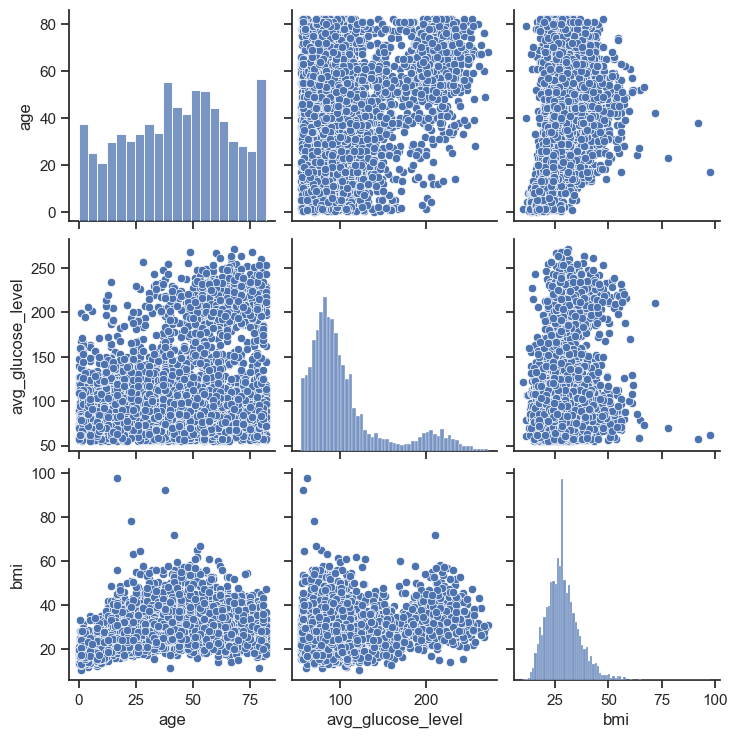

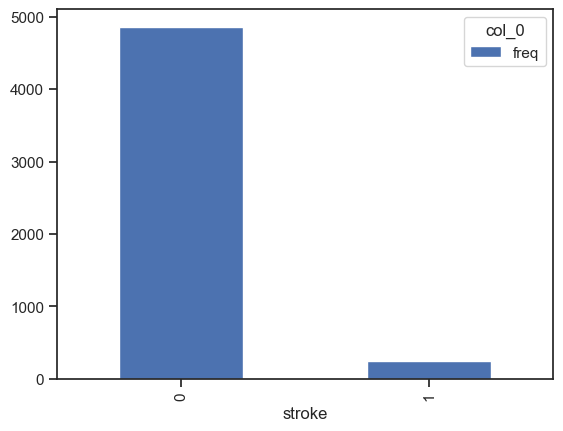

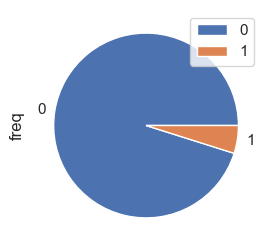

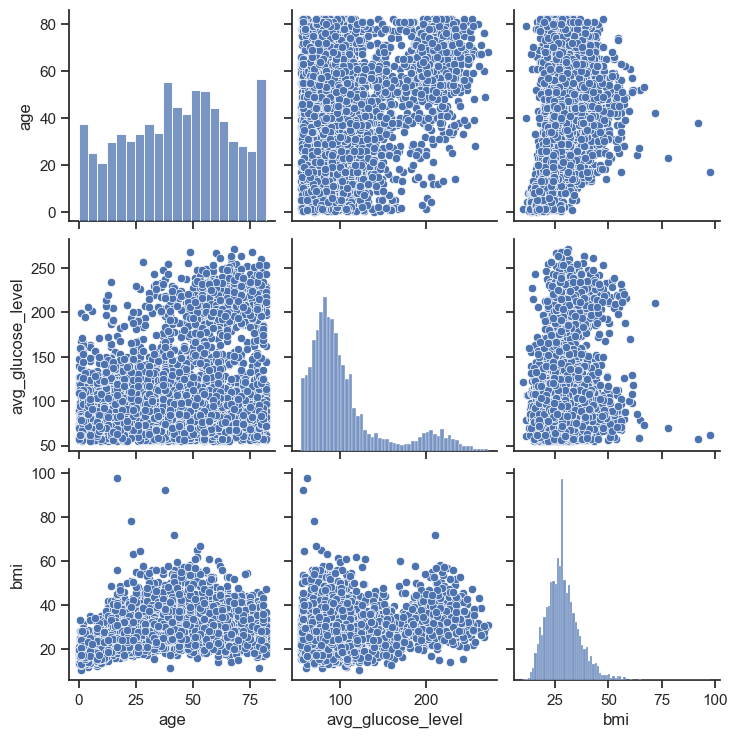

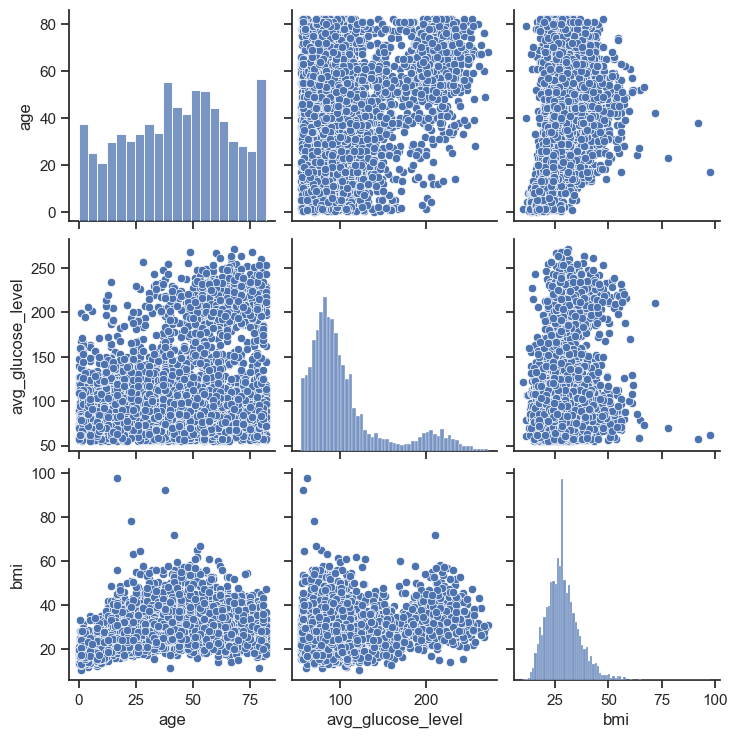

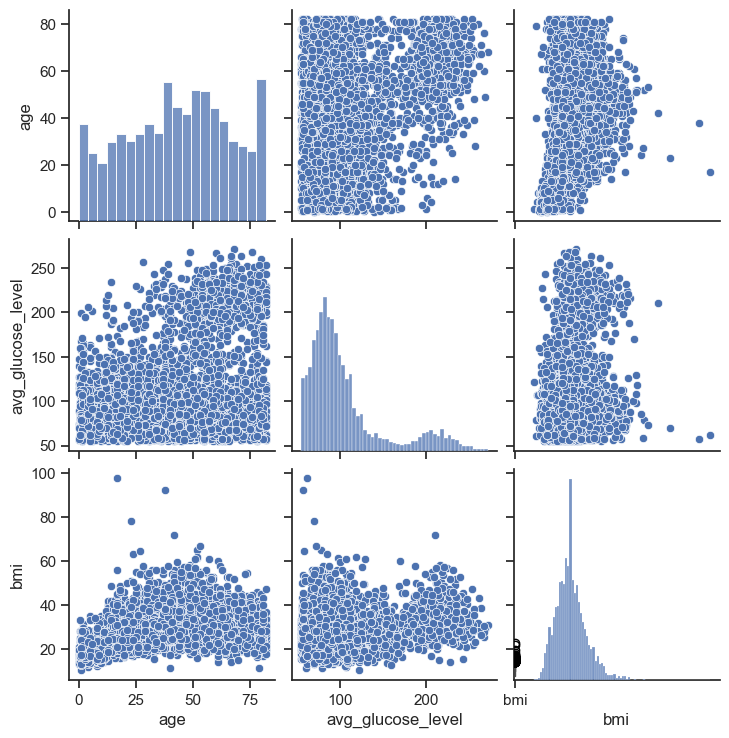

In [438]:
df.boxplot(column="bmi")
plt.show()

In [439]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()) # On remplace les valeurs vides par la valeur minimales

In [440]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

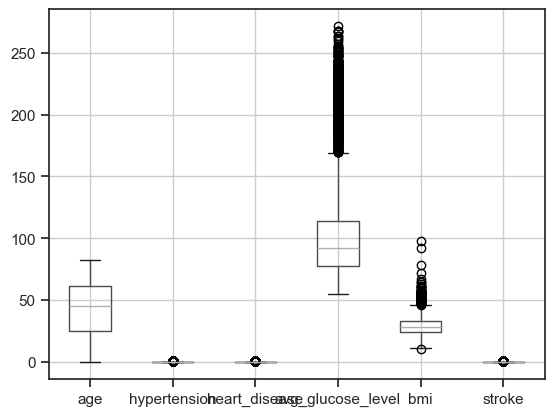

In [441]:
df.boxplot()
plt.show()

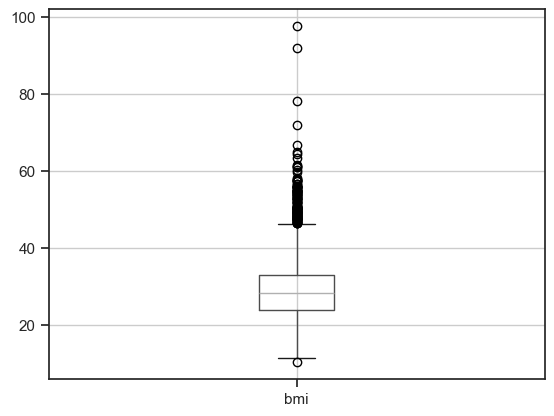

In [442]:
dataset = pd.read_csv("stroke_data.csv", sep = ";")
dataset = dataset.drop(columns="id", axis=1)
dataset.bmi = dataset.bmi.fillna(dataset.bmi.quantile(0.5))  # On crée une nouvelle dataset ou les valeurs manquantes du bmi sont remplacées par le quantile au lieu de la médiane
dataset.boxplot(column="bmi")
plt.show()

In [443]:
pd.crosstab(dataset.stroke,"freq")#calculer la frequence pour chaque valeur de stoke dans un tableau croisé


col_0,freq
stroke,
0,4861
1,249


In [444]:
pd.crosstab(dataset.stroke,"freq",normalize = True)

col_0,freq
stroke,
0,0.951272
1,0.048728


In [445]:
pd.crosstab(dataset.stroke,"freq",normalize = True).plot.bar()

<Axes: xlabel='stroke'>

In [446]:
pd.crosstab(dataset.stroke,"freq",normalize = True).plot.pie(subplots = True,figsize = (3, 3))

array([<Axes: ylabel='freq'>], dtype=object)

In [447]:
numCol = []
catCol = []
for col in dataset.columns : 
    if(dataset[col].nunique()>5):#nombre de valeurs unique
        numCol.append(col)
    else :
        if dataset[col].nunique() != 1:
            catCol.append(col)

In [448]:
print(numCol)

['age', 'avg_glucose_level', 'bmi']


In [449]:
print(catCol)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


In [450]:
dataset['age'].nunique() #retourne le nombre des valeurs unique de colonne age

104

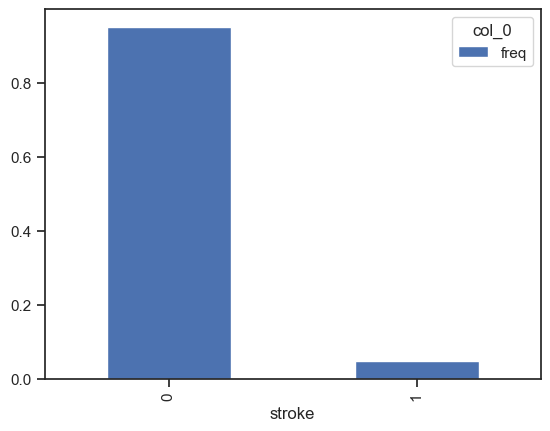

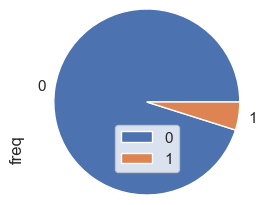

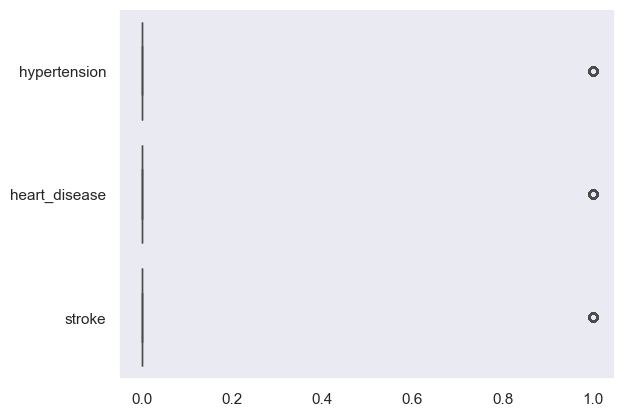

In [451]:
my_list_1 = ['age', 'bmi']
my_list_2 = ['avg_glucose_level']
my_list_3 = ['hypertension', 'heart_disease', 'stroke']
sns.set(style = 'whitegrid')
sns.boxplot(data = dataset[my_list_2], orient='h')
plt.show()
sns.set(style = 'dark')
sns.boxplot(data = dataset[my_list_3], orient = 'h')
plt.show()

In [452]:
x = dataset.iloc[:,0:10] #features
y = dataset["stroke"]  #cibles

In [453]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(X_train.shape)


(4088, 10)


In [454]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [455]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [456]:
x1 = x
X2 = x
X = x.values
X1 = x1.values
Y = y.values

In [457]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

X[:,0]=label.fit_transform(X[:,0])
X[:,4]=label.fit_transform(X[:,4])
X[:,5]=label.fit_transform(X[:,5])
X[:,6]=label.fit_transform(X[:,6])
X[:,9]=label.fit_transform(X[:,9])

In [458]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [459]:
X[0:4:]

array([[1, 67.0, 0, 1, 1, 2, 1, 228.69, 36.6, 1],
       [0, 61.0, 0, 0, 1, 3, 0, 202.21, 28.1, 2],
       [1, 80.0, 0, 1, 1, 2, 0, 105.92, 32.5, 2],
       [0, 49.0, 0, 0, 1, 2, 1, 171.23, 34.4, 3]], dtype=object)

In [460]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

ct=ColumnTransformer([("gendre",OneHotEncoder(),[0])],remainder='passthrough')
X1=ct.fit_transform(X1)
X1=X1[:,1:]

In [461]:
ct=ColumnTransformer([("ever_married",OneHotEncoder(),[5])],remainder='passthrough') #l'indice de ever_married devient 4+1=5 car on a ajouter une colonne du code de "gender" donc il y a decalage par 1
X1=ct.fit_transform(X1)
X1=X1[:,1:]

ct=ColumnTransformer([("work_type",OneHotEncoder(),[6])],remainder='passthrough') 
X1=ct.fit_transform(X1)
X1=X1[:,1:]

ct=ColumnTransformer([("Residence_type",OneHotEncoder(), [10])],remainder='passthrough') 
X1=ct.fit_transform(X1)
X1=X1[:,1:]

ct=ColumnTransformer([("smoking_status",OneHotEncoder(), [13])],remainder='passthrough') 
X1=ct.fit_transform(X1)
X1=X1[:,1:]
X1

array([[1.0, 0.0, 0.0, ..., 1, 228.69, 36.6],
       [0.0, 1.0, 0.0, ..., 0, 202.21, 28.1],
       [0.0, 1.0, 0.0, ..., 1, 105.92, 32.5],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 82.99, 30.6],
       [1.0, 0.0, 0.0, ..., 0, 166.29, 25.6],
       [0.0, 0.0, 0.0, ..., 0, 85.28, 26.2]], dtype=object)

In [462]:
#Dummies 
X2=pd.get_dummies(data=X2,drop_first=True)

In [463]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(4088, 10)

In [464]:
list=['age','avg_glucose_level','bmi']
dataset1=dataset[list]
sns.set(style='ticks')
sns.pairplot(dataset1)

In [465]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
from sklearn.preprocessing import MinMaxScaler
msc=MinMaxScaler()
X_train_sc=msc.fit_transform(X_train)
X_test_sc=msc.transform(X_test)
X_train_sc, X_test_sc

(array([[0.        , 0.43847656, 0.        , ..., 0.05618133, 0.3024055 ,
         0.33333333],
        [0.        , 0.4140625 , 0.        , ..., 0.13115132, 0.43757159,
         0.33333333],
        [0.5       , 0.73144531, 0.        , ..., 0.04634844, 0.23482245,
         0.66666667],
        ...,
        [0.5       , 0.53613281, 0.        , ..., 0.18276244, 0.20733104,
         1.        ],
        [0.5       , 0.25537109, 0.        , ..., 0.30385006, 0.22222222,
         0.33333333],
        [0.        , 0.70703125, 1.        , ..., 0.02031207, 0.26231386,
         0.66666667]]),
 array([[0.5       , 1.        , 0.        , ..., 0.4144585 , 0.18442153,
         1.        ],
        [0.5       , 0.04785156, 0.        , ..., 0.23589696, 0.07331042,
         0.        ],
        [0.5       , 0.70703125, 0.        , ..., 0.11462469, 0.17869416,
         0.66666667],
        ...,
        [0.5       , 0.63378906, 0.        , ..., 0.0657834 , 0.29667812,
         0.        ],
        [0.5

In [466]:
my_list = ['age', 'avg_glucose_level','bmi']
dataset1 = dataset[my_list]
sns.set(style='ticks')
sns.pairplot(dataset1)

In [467]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [468]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
X_train_sc = msc.fit_transform(X_train)
X_test_sc = msc.fit_transform(X_test)

In [469]:
t = pd.crosstab(dataset.stroke, "freq")
t.plot.bar()
t.plot.pie(subplots=True, figsize =(3,3))

array([<Axes: ylabel='freq'>], dtype=object)